Calculating the Hausdorff distances...
	diameter = 1.0E-01, distance = 1.15E+01
	diameter = 1.0E-02, distance = 1.28E+00
	diameter = 1.0E-03, distance = 1.06E-01
	diameter = 1.0E-04, distance = 1.11E-02
Done!


Slope:1.0133656344906203 intercept:2.093682136220778


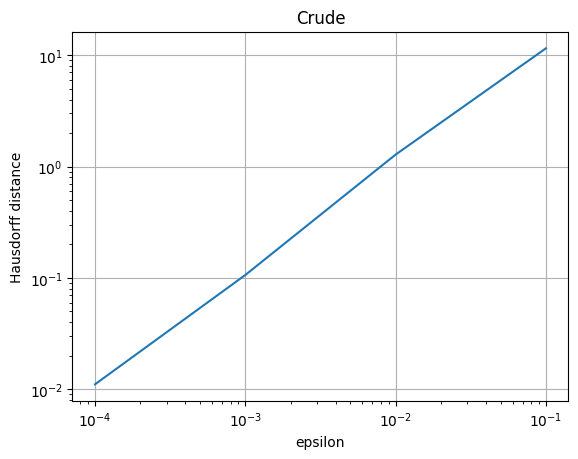

Crude Selection executed


In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from pyomo.opt import SolverFactory, TerminationCondition
from src.analyses.value_function import ValueFunction
from src.analyses.convergence_analysis import HausdorffAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
from scipy.optimize import curve_fit
def get_critical_width(alg,y_optimal,k=1,abs_epsilon=0.01):
    haus=HausdorffAnalyzer(alg)
    print(f"width: {abs_epsilon/k}")
    print(haus._gen_interval(y_optimal,abs_epsilon/k))
def linear_func(x, a, b):
        return a * x + b
def convergence_analysis(alg,fixed_pt,optimal_sol,start=-5,stop=0,steps=6,name="instance"):

    haus=HausdorffAnalyzer(alg)
    eps_list, distances=haus.analyze(y=fixed_pt, v=optimal_sol,
                    eps_min= start, eps_max = stop, steps= steps,
                    y_optimal= True)
    log_eps = np.log10(eps_list)
    log_distances = np.log10(distances)

    # Perform curve fitting
    params, _ = curve_fit(linear_func, log_eps, log_distances)
    print(f"Slope:{params[0]} intercept:{params[1]}")
    plt.loglog(eps_list, distances)
    plt.grid()
    plt.xticks(np.logspace(start, stop, steps))
    plt.xlabel("epsilon")
    plt.ylabel("Hausdorff distance")
    plt.title(name)
    plt.show()
from NSPLIB.src.instances.crude_selection.crude_selection import const_model
crude_obj = -18350.146929611754
crude_sol = {f'crudeQuantity[{i}]': 0. for i in range(1, 10 + 1)}
crude_sol['crudeQuantity[2]'] = 150.87595641747944
crude_sol['crudeQuantity[3]'] = 201.29570746971186
crude_sol['crudeQuantity[4]'] = 56.18456149457359
crude_sol['crudeQuantity[8]'] = 162.2466500589715
crude_sol['crudeQuantity[10]'] = 18.848116800048512
crude_y_bound = {
    'crudeQuantity[1]': [0, 201.29570747217807],
    'crudeQuantity[2]': [0, 212.48012718600953],
    'crudeQuantity[3]': [0, 201.29570747217807],
    'crudeQuantity[4]': [0, 199.57869634340224],
    'crudeQuantity[5]': [0, 210.54848966613673],
    'crudeQuantity[6]': [0, 222.1383147853736],
    'crudeQuantity[7]': [0, 196.7885532591415],
    'crudeQuantity[8]': [0, 208.54531001589828],
    'crudeQuantity[9]': [0, 204.3720190779014],
    'crudeQuantity[10]': [0, 210.2623211446741]
}

sto_m = const_model()
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
binary_ys = [f'pickCrude[{i}]' for i in range(1, 10 + 1)]
binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['pickCrude[2]'] = 1
binary_y_val['pickCrude[3]'] = 1
binary_y_val['pickCrude[4]'] = 1
binary_y_val['pickCrude[8]'] = 1
binary_y_val['pickCrude[10]'] = 1
m.fix_binary_y(binary_y_val)
updated_y_bound=m.y_bound
updated_y_bound['crudeQuantity[1]']=(0,0)
updated_y_bound['crudeQuantity[5]']=(0,0)
updated_y_bound['crudeQuantity[6]']=(0,0)
updated_y_bound['crudeQuantity[7]']=(0,0)
updated_y_bound['crudeQuantity[9]']=(0,0)
m.update_y_bound(updated_y_bound)
alg=LagrangeanAlgo(m,solver="baron",lag_iter=20)
convergence_analysis(alg,crude_sol,crude_obj,start=-4,stop=-1,steps=4,name="Crude")
print("Crude Selection executed")